### pydot is an interface to Graphviz

In [37]:
!pip install pydot

In [6]:
import string
import math
import pydot
from IPython.display import Image

In [115]:
def fhash(string):
    global letters
    
    def fst_code(x):
        return str(int(round(x**(0.5), 1) * 10))
    
    string = string.lower()
    
    fst = string[0]
    tail = string[1:]
    
    hash_v = fst_code(letters[fst])
    
    for letter in tail:
        tmp = str(letters[letter])
        hash_v += tmp.zfill(2)
    
    return hash_v

In [116]:
def demo(string):
    global letters
    
    unhashed = ''
    
    def fst_code(x):
        return str(int(round(x**(0.5), 1) * 10))
    
    string = string.lower()
    
    fst = dict(zip(list(map(fst_code, letters.values())), letters.keys()))
    tail = dict(zip(list(map(lambda x: str(x).zfill(2), letters.values())), letters.keys()))
    
    for i in range(len(string) // 2):
        if i == 0:
            unhashed += fst[string[2*i:2*i+2]]
        else:
            unhashed += tail[string[2*i:2*i+2]]
            
    return unhashed.capitalize()

In [117]:
# класс нода (вузол)
class Node: 
    
    # ініціалізуємо параметри вузла
    def __init__(self, order):
        #   - порядок (максимальна кількість посилань у вузлі - (кіль. елем. плюс 1),
        #              або, іншими словами, максимальна кількість нащадків вузла)
        #   - ключі (посилання, за якими зберігаються елементи дерева (це або
        #            нащадки вузла, або безпосередньо елементи (якщо нода вже 
        #            є листком)))
        #   - значення елементів (безпосередні значення, що зберігаються у дереві.
        #                         При чому якщо однакових значень ≥2, то вони збері-
        #                         гаються в одному ключі (передбачені дублікати))
        #   - наступний ключ (посилання на наступний елемент вузла по порядку)
        #   - батьківська нода (посилання на ноду-попередника, якщо це не корінь дерева)
        #   - is_leaf (чи це вузол (має нащадків), чи це лист (без нащадків))

        self.order = order
        self.values = []
        self.keys = []
        self.nextKey = None
        self.parent = None
        self.is_leaf = False
    
    
    # функція вставки елементу у вузол
    def insertINLeaf(self, leaf, value, key):
        
        # якщо нода не пуста (в ній існують якісь елементи)
        if (self.values):
            
            # тимчасово зберігаємо початкові значення вузла
            temp1 = self.values
            
            # проходимось по всіх елементах вузла
            for i in range(len(temp1)):
                
                # якщо таке значення вже існує, то його ключ
                # (а не значення) до вже існуючого ключа
                if (value == temp1[i]):
                    self.keys[i].append(key)
                    break
                    
                # якщо значення менше за певне i-те значення, що 
                # знаходилось у ноді, то беремо (i-1) попередні 
                # значення, нове додане, і всі інші хвостові, 
                # починаючи з і-того (вставляємо нове значення
                # на i-ту позицію)
                elif (value < temp1[i]):
                    self.values = self.values[:i] + [value] + self.values[i:]
                    self.keys = self.keys[:i] + [[key]] + self.keys[i:]
                    break
                    
                # якщо новий елемент більший за будь-який існуючий
                # елемент у ноді, то додаємо його в кінець списка значень
                # разом з його відповідним ключем
                elif (i+1 == len(temp1)):
                    self.values.append(value)
                    self.keys.append([key])
                    break
                    
        # якщо нода пуста, то її першим елементом буде той
        # новий елемент, що "поступив на вхід"
        else:
            self.values = [value]
            self.keys= [[key]]

In [118]:
class BplusTree:
    
    # ініціалізуємо параметри дерева: дефолтні
    # значення - макс. кільк. посилань на ноду
    # дерева і найперший вузол (корінь) є листком
    def __init__(self, order):
        self.root = Node(order)
        self.root.is_leaf = True
        
    def insert(self, value, key):
        value = str(value)
        
        # спочатку виконуємо пошук в дереві нового
        # елемента, який ми збираємось вставляти:
        # якщо такий елемент вже існує, то він додасться
        # по існуючому ключу, якщо не існує - функція
        # пошуку поверне листок, у якому це значення
        # потенційно (за логікою і правилами В+ дерева)
        # мало б знаходитися
        old_node = self.search(value)
        
        # у повернутий листок вставляємо нове значення
        old_node.insertINLeaf(old_node, value, key)
        
        # якщо листок став переповнений елементами (на 1 
        # більше, ніж може містити, тобто стільки ж скільки
        # посилань може містити сама нода)
        if (len(old_node.values) == old_node.order):
            
            # створюємо нову ноду (листок) з такими самими 
            # параметрами, що і у старої (переповненої) ноди
            node1 = Node(old_node.order)
            node1.is_leaf = True
            
            # новостворений листок робимо так само нащадком
            # батьківського вузла старої ноди
            node1.parent = old_node.parent
            
            # відділяємо значення половини кількості елементів
            # на старому листку (якщо order(кількість посилань) =
            # = 3, тобто кількість елементів = 3 - 1 = 2, то 
            # math.ceil(3/2) - 1 = 2 - 1 = 1, якщо order = 4, то
            # кількість елементів = 4 - 1 = 3, а math.ceil(4/2) - 
            # - 1 = 2 - 1 = 1)
            mid = int(math.ceil(old_node.order/2))-1
            
            # забираємо другу половину старих ключів і значень
            # у ключі і значення нового листка
            node1.values = old_node.values[mid+1:]
            node1.keys = old_node.keys[mid+1:]
            node1.nextKey = old_node.nextKey 
            
            # ключі і значення старої ноди (листка) лишають собі
            # тільки половину (першу) від тих ключів і значень,
            # що листок містив на момент переповнення елементами
            old_node.values = old_node.values[:mid+1]
            old_node.keys = old_node.keys[:mid+1]
            
            # наступним ключем (сусіднім листком) старого листка 
            # робимо нову ноду (листок), що тепер містить другу
            # половину ключів і значень старого листка до переповнення
            old_node.nextKey = node1
            
            # додаємо до батьківського вузла старого листка новий
            # листок, утворений після розщеплення старого листка навпіл,
            # і значення, за яким відбувалося розщеплення (найменший 
            # елемент у правому піддереві, тобто перший елемент зі 
            # списку елементів нової ноди)
            self.insertINParent(old_node, node1.values[0], node1)
            
        
    # функція пошуку елемента у дереві
    def search(self, value):
        # початок пошуку відбувається з корня дерева
        current_node = self.root
        
        # робимо пошук поки не дійдемо до листка
        while(current_node.is_leaf == False):
            
            # тимчасово зберігаємо значення поточного вузла
            temp2 = current_node.values
            
            for i in range(len(temp2)):
                
                # якщо значення менше за i-те значення у вузлі,
                # то переходимо за посиланням до лівого (і-того)
                # нащадка вузла, інакше - значення не є меншим
                # за і-те значення, тож переходимо на наступного
                # (i+1) нащадка поточного вузла
                if (value == temp2[i]):
                    current_node = current_node.keys[i+1]
                    break
                elif (value < temp2[i]):
                    current_node = current_node.keys[i]
                    break
                    
                # якщо всі елементи вузла пройдено і шуканого
                # значення не знайдено - переходимо на
                # наступну крайнього 'правого' нащадка
                elif (i+1 == len(current_node.values)):
                    current_node = current_node.keys[i+1]
                    break
                    
        return current_node
    
    # функція визначення вдалості пошуку
    def find(self, value, key):
        # l - шукане значення, яке ми передаємо
        #     у функцію пошуку на дереві
        l = self.search(value)
        
        # проходимось по всіх значеннях того
        # вузла, що повернувся в результаті пошуку
        for i, item in enumerate(l.values):
            
            # якщо одне зі значень повернутого вузла
            # співпадає з шуканим value
            if item == value:
                
                # У дереві B+ одне значення може мати 
                # декілька ключів, оскільки ключі зберігаються 
                # як список, тож необхідно зробити перевірку
                # чи ми знайшли саме той екземпляр значення,
                # що нам був необхідний (порівнюючи по ключу)
                if key in l.keys[i]:
                    return True
                else:
                    return False
        return False
            
    # функція вставки вузла у батьківський вузол
    def insertINParent(self, n, value, ndash):
        ''' розщеплення кореня дерева відбуватиметься лиш раз.
            Після того, як ми виконали розщеплення, до корня 
            можуть додаватись лиш нові нащадки. Якщо нащадків
            стане забагато, то розщеплення відбуватиметься у 
            нащадків, а не у корня дерева
        '''
        
        # якщо старим листком був корінь дерева, то робитимемо
        # 'розщеплення кореня' з утворенням двох нащадків
        if (self.root == n):
            
            # порядок дерева беремо такий самий, що і у старого
            # вузла
            rootNode = Node(n.order)
            
            # значенням вузла буде значення, за яким відбувалось
            # розщеплення вузла з утворенням двох нащадків (наймен-
            # ший елемент у правому піддереві)
            rootNode.values = [value]
            
            # вузол тепер має зберігати усі ті ключі, які зберігаються
            # на листках (у лівому і правому нащадках)
            rootNode.keys = [n, ndash]
            
            # робимо корінь дерева новостворений вузол
            self.root = rootNode
            
            # посилаємо старий розщеплений корінь (тобто два
            # новоутворених листка) на новий корінь дерева
            n.parent = rootNode
            ndash.parent = rootNode
            
            return
        
        # зберігаємо старий батьківський вузол і
        # (тимчасово) ключі на ньому
        parentNode = n.parent
        temp3 = parentNode.keys
        
        # проходимося по усіх ключах (нащадках) вузла
        for i in range(len(temp3)):
            
            # якщо один із нащадків це старий нащадок, 
            # що переповнився і розщепився
            if (temp3[i] == n):
                
                # просто додаємо до батьківської ноди ключі та елементи 
                # з нової ноди (до розщеплення дочірнього вузла батьківська
                # нода містила ключі і значення старої ноди (та якихось інших
                # нод, але ми на них не звертаємо увагу). Після розщеплення
                # старої ноди утворилась стара нода з половиною своїх значень
                # і нова нода (з нововставленим елементом). Ми додаємо до
                # батьківської ноди (яка і так містила старі елементи) ще
                # ключі та елементи нової ноди)
                parentNode.values = parentNode.values[:i] + [value] + parentNode.values[i:]
                parentNode.keys = parentNode.keys[:i+1] + [ndash] + parentNode.keys[i+1:]
                
                # якщо батьківська нода стала переповненою (посилань, 
                # тобто нащадків, стало більше за дозволену кількість)
                # ця умова розбиватиме батьківський вузол на два
                # вузла, які стануть нащадками для батьківського
                # вузла батьківського вузла. Розщеплення відбуватиметься
                # за правилами і логікою В+ дерева
                if (len(parentNode.keys) > parentNode.order):
                    
                    # створюємо новий вузол такого самого порядку, що
                    # і старий батьківський вузол, що став переповненим
                    parentdash = Node(parentNode.order)
                    
                    # батьківським вузлом для нового вузла робимо той
                    # вузол, що був батьківським для старого батьківського
                    parentdash.parent = parentNode.parent
                    
                    # відмічаємо половину елементів
                    mid = int(math.ceil(parentNode.order/2))-1
                    
                    # другу половину ключів та елементів зі старого 
                    # батьківського вузла перекидаємо на новий вузол-сусіда
                    parentdash.values = parentNode.values[mid+1:]
                    parentdash.keys = parentNode.keys[mid+1:]
                    
                    # відмічаємо найменший елемент нового вузла (елемент,
                    # за яким відбулось розщеплення переповненого вузла
                    # на два нових)
                    value_ = parentNode.values[mid]
                    
                    # якщо порядок дерева був 2, то mid значення буде
                    # рівне 0. В такому випадку на вузлі міг зберігатись
                    # максимум 1 елемент, після переповнення їх стало 2,
                    # тож на лівий нащадок піде тільки 1 елемент (тому ми
                    # і вибираємо [:mid+1], тобто [:0+1], [0:1])
                    if (mid == 0):
                        parentNode.values = parentNode.values[:mid+1]
                        
                    # в протилежному випадку (наприклад, при 4 нащадках, тобто
                    # 3 елементах), mid = 1, тобто все нормально
                    else:
                        parentNode.values = parentNode.values[:mid]
                        
                    # в половину старої батьківської ноди беремо
                    # на 1 більше ключів, ніж елементів, адже кількість
                    # нащадків = кількість елементів + 1
                    parentNode.keys = parentNode.keys[:mid+1]
                    
                    # посилаємо усі нащадки батьківського вузла до
                    # розщеплення на правильних нащадків після розщеплення
                    for j in parentNode.keys:
                        j.parent = parentNode
                    for j in parentdash.keys:
                        j.parent = parentdash
                        
                    # робимо заново вставку у батьківську ноду (в такому 
                    # випадку ми вже не заходитимемо в поточний блок, адже
                    # батьківська нода вже розщеплення і переповнення немає)
                    self.insertINParent(parentNode, value_, parentdash)

                    
    # функція пошуку усіх елементів дерева, що менше/більше заданого
    def getRange(self, value, greater_than=False, less_than=False):
        
        # якщо нас цікавлять усі елементи, що більше за заданий, 
        # то достатньо знайти лист, у якому розташований елемент,
        # а потім виводити усі елементи після заданого (ми можемо
        # переходити від листа до листа, тож ніяких проблем немає)
        if greater_than:
            current_node = self.search(value)
            
        # якщо нас цікавлять усі елементи, що менше заданого, то
        # знаходимо лист, у якому міститься найменший елемент дерева
        # (в силу того, як реалізований пошук, достатньо передати
        # значення, яке буде меншим за будь-яке потенційне число на
        # виході хеш-функції (наприклад, '0'), і тоді функція пошуку
        # поверне лист, у якому цей елемент міг би знаходитись)
        else:
            current_node = self.search('0')

        # список для зберігання знайдених елементів
        found_values = []

        # цикл для обходу листів або піддерев
        while True:
            
            # проходимо по всіх елементах повернутого (поточ-
            # ного листа)
            for i, item in enumerate(current_node.values):
                
                if greater_than and item > value:
                    found_values.append(item)

                if less_than and item < value:
                    found_values.append(item)

            # перехід до наступного листа, якщо поточний лист
            # не є останнім
            if current_node.nextKey is not None:
                current_node = current_node.nextKey
            else:
                break

        # повернення списку знайдених елементів
        return found_values
                    
    
    # функція видалення елемента з дерева
    def delete(self, value, key):
        
        # спочатку виконуємо пошук елемента, що необхідно
        # видалити. Якщо цей елемент існує, то функція
        # пошуку поверне відповідний вузол, у якому значення
        # шукатиметься по ключу. Якщо такого значення не існує,
        # то повернеться лист, у якому це значення за логікою і
        # правилами В+ дерева мало б знаходитись, після чого
        # виконається обхід усіх ключів листа, і через незнахо-
        # дження відповідності повернеться повідомлення про
        # відсутність такого елемента в дереві
        node_ = self.search(value)
        
        # флаг, що вказує на стан шуканого елемента (по дефолту
        # вважаємо, що він не знайдений)
        flag = False
        
        # проходимось по всіх значеннях повернутої ноди
        for i, item in enumerate(node_.values):
            
            # якщо одне зі значень вузла співпадає з шуканим 
            # значенням
            if item == value:
                
                # міняємо флаг на значення 'елемент знайдено'
                flag = True

                # якщо потрібний ключ знаходиться у вузлі дерева
                if key in node_.keys[i]:
                    
                    # раніше, коли ми робили вставку, то ми перевіряли
                    # чи не існує значення, що ми хочемо вставити, у 
                    # дереві. Якщо воно існувало, то до ключа значення
                    # ми додавали ще один  ключ. Таким чином, даний
                    # випадок описує порядок дій для такої ситуації:
                    # те, що дерево містить дублікати, означає, що в
                    # ньому є 2 однакових ключа, що 'посилаються' на
                    # один і той самий елемент. Тож аби прибрати один
                    # дублікат ми видаляємо один ключ зі списку однакових
                    # ключів. Це зручно тому, що коли ключ лишиться лиш
                    # один, то випадок зведеться до загального - видалення
                    # елемента з дерева
                    if len(node_.keys[i]) > 1:
                        node_.keys[i].pop(node_.keys[i].index(key))
                        
                    # якщо повернута нода є корнем дерева, то просто
                    # видаляємо з неї ключ і значення
                    elif node_ == self.root:
                        node_.values.pop(i)
                        node_.keys.pop(i)
                        
                    # якщо нода не є корнем і не містить дублікатів
                    else:
                        node_.keys[i].pop(node_.keys[i].index(key))
                        del node_.keys[i]
                        node_.values.pop(node_.values.index(value))
                        self.deleteEntry(node_, value, key)
                        
                # якщо потрібного ключа у вузлі дерева немає
                else:
                    print("Немає значення з таким ключем")
                    return
                
        # якщо функція пошуку повернула лист, в якому немає
        # шуканого значення, то повертаємо повідомлення про
        # відсутність такого значення у дереві в принципі
        if not flag:
            print("Значення відсутнє у дереві")
            return


    def deleteEntry(self, node_, value, key): 
        
        # якщо нода не є листком
        if node_.is_leaf == False:
            
            # проходимось по ключах ноди
            for i, item in enumerate(node_.keys):
                
                # якщо один з ключів ноди є шуканим ключем
                # то видаляємо цей ключ
                if item == key:
                    node_.keys.pop(i)
                    break
            
            # аналогічно шукаємо на ноді значення і 
            # видаляємо його, якщо знаходимо
            for i, item in enumerate(node_.values):
                if item == value:
                    node_.values.pop(i)
                    break
            
            
        # якщо нода є корнем дерева і містить лиш 1 ключ,
        # тобто вона вже не містить елементів, то ми
        # видаляємо цю ноду
        if self.root == node_ and len(node_.keys) == 1:
            self.root = node_.keys[0]
            node_.keys[0].parent = None
            del node_
            return
        
        # якщо ключів менше за мінімально допустиму кількість
        # і вузол не є листком (повидаляли забагато нащадків) 
        # АБО якщо елементів менше за мінімально допустиму кількість 
        # та вузол є листком (повидаляли забагато елементів з листка), 
        # то необхідно здійснити ребалансування дерева
        elif (len(node_.keys) < int(math.ceil(node_.order/2)) and node_.is_leaf==False) or (len(node_.values) < int(math.ceil((node_.order-1)/2)) and node_.is_leaf==True):

            # флаг, що вказуватиме чи є
            # нода попередником поточної
            is_predecessor = 0
            
            # батьківська нода вузла, у
            # якому відбуватиметься видалення
            parentNode = node_.parent
            
            # значення по дефолту, що вказуватимуть
            # на відсутність попередньої чи наступної
            # ноди від поточної ноди
            PrevNode = -1
            NextNode = -1
            
            # аналогічно значення, що по дефолту 
            # вказують на те, що до чи після поточної
            # ноди немає ключів у батьківському вузлі
            PrevK = -1
            PostK = -1
            
            # проходимось по нащадках батьківської ноди
            for i, item in enumerate(parentNode.keys):

                # коли ми потрапимо на нашу ноду
                if item == node_:
                    
                    # якщо нода по порядку не є першою
                    # то відмічаємо її попередника 
                    # (попередню сусідню ноду)
                    if i > 0:
                        PrevNode = parentNode.keys[i-1]
                        PrevK = parentNode.values[i-1]
                        
                    # якщо нода не є останньою, то 
                    # відмічаємо її наступника 
                    # (наступну сусідню ноду)
                    if i < len(parentNode.keys)-1:
                        NextNode = parentNode.keys[i+1]
                        PostK = parentNode.values[i]
            
            # якщо попередньої ноди не існує (тобто
            # поточна нода є найлівішим нащадком батьків-
            # ської ноди)
            if PrevNode == -1:
                
                # нода, що йтиме в парі з нодою, по якій
                # відбувається видалення, буде не попередня
                # (адже її як такої не може бути), а, вочевидь,
                # наступна після поточної
                ndash = NextNode
                value_ = PostK
                
            # аналогічно якщо не існує наступної ноди після
            # поточної, то в пару ставиться попередня нода
            elif NextNode == -1:
                
                # позначаємо, що використовуватиметься 
                # нода-попередник
                is_predecessor = 1
                
                ndash = PrevNode
                value_ = PrevK
                
            # якщо існує і попередня і наступна ноди 
            else:
                
                # якщо поточна нода, з якої відбулось видалення,
                # зможе злитися з наступною нодою в одну в силу 
                # того, що на них сумарно стане стільки елементів,
                # скільки дозволено властивостями дерева
                if len(node_.values) + len(NextNode.values) < node_.order:
                    
                    # то для злиття використовуватимемо наступну ноду
                    ndash = NextNode
                    value_ = PostK
                    
                # якщо наступна нода виявилась заповненою, то для 
                # злиття використовуватимемо попередню ноду
                else:
                    is_predecessor = 1
                    ndash = PrevNode
                    value_ = PrevK
                    
            # якщо на ноді, з якої відбувається видалення, і на ноді
            # обраній для злиття (попередня чи наступна нода), сумарно
            # після злиття вийде допустима кількість елементів, тобто
            # якщо злиття можна здійснити
            if len(node_.values) + len(ndash.values) < node_.order:
                
                # якщо нода для злиття є наступником
                if is_predecessor == 0:
                    
                    # то ноду на видалення і ноду-наступника
                    # для злиття міняємо місцями (оскільки для 
                    # листків ми маємо вказівники лиш на наступні
                    # листки і не можемо контролювати вказівники
                    # на поточний лист з попереднього листа, то
                    # такий свап є єдиним можливим рішенням для
                    # коректного збереження порядку листів)
                    node_, ndash = ndash, node_
                
                # ndash це тепер нода на видалення, а node_ це
                # нода-наступник. Ми переливаємо ключі з ноди-наступника 
                # на ноду на видалення, і тепер видалятимемо ноду-наступника
                ndash.keys += node_.keys
                
                # якщо нода не є листком
                if not node_.is_leaf:
                    
                    # то її елементи переганяємо до елементів
                    # ноди для злиття (якщо нода для злиття
                    # була нодою-наступником, то ми тепер з
                    # ноди-наступника переганяємо елементи на 
                    # поточну ноду і видалятимемо не поточну ноду, 
                    # а ноду-наступника)
                    ndash.values.append(value_)
                    
                # якщо нода є листком
                else:
                    
                    # ndash тепер у будь-якому випадку
                    # є нодою-попередником до node_:
                    # якщо ndash була нодою-попередником
                    # то нічого не змінилось, а якщо була
                    # нодою-наступником, то ми змінили її
                    # з нодою на видалення місцями
                    
                    # в дереві лишиться лиш нода-попередник,
                    # яка тепер вказуватиме на наступний елемент
                    # після наступної ноди, поміченої на видалення
                    ndash.nextKey = node_.nextKey
                    
                # складаємо елементи з ноди на видалення у елементи
                # ноди на злиття
                ndash.values += node_.values
                
                # якщо нода на злиття не є листком
                if not ndash.is_leaf:
                    
                    # то після злиття двох нелисткових нод необхідно
                    # пройтись по ключам (нащадкам) видаленого вузла
                    # і вказати їх батьківським вузлом новий вузол,
                    # утворений після злиття
                    for j in ndash.keys:
                        j.parent = ndash
                
                # йдемо в батьківську ноду вузла на видалення
                # і видаляємо з нього відповідний елемент
                self.deleteEntry(node_.parent, value_, node_)
                
                # остаточно позбавляємось ноди на видалення
                del node_
                
            # якщо обрані ноди до злиття не можуть бути злиті в одну
            else:
                
                # якщо нода на злиття є попередником
                if is_predecessor == 1:
                    
                    # якщо нода на видалення не є листком
                    if node_.is_leaf == False:
                        
                        # витягаємо з наповненої ноди-попередника останній
                        # елемент і відповідно його ключ
                        ndashpm = ndash.keys.pop(-1)
                        ndashkm_1 = ndash.values.pop(-1)
                        
                        # і перекидаємо їх на поточну ноду, на якій
                        # мало б відбуватись видалення
                        node_.keys = [ndashpm] + node_.keys
                        node_.values = [value_] + node_.values
                        
                        # йдемо у батьківську ноду 
                        parentNode = node_.parent
                        for i, item in enumerate(parentNode.values):
                            
                            # заміняємо елемент, що треба було видалити,
                            # на останній елемент і його ключ ноди-попередника
                            if item == value_:
                                parentNode.values[i] = ndashkm_1
                                parentNode.keys[i] = ndashpm
                                break
                                
                    # якщо нода на видалення є листком
                    else:
                        
                        # витягаємо з ноди-попередника останній ключ і елемент
                        ndashpm = ndash.keys.pop(-1)
                        ndashkm = ndash.values.pop(-1)
                        
                        # додаємо їх на початок наступної ноди, в якій мало
                        # б відбуватись видалення
                        node_.keys = [ndashpm] + node_.keys
                        node_.values = [ndashkm] + node_.values
                        parentNode = node_.parent
                        for i, item in enumerate(parentNode.values):
                            if item == value_:
                                parentNode.values[i] = ndashkm
                                break
                                
                # якщо нода на злиття є наступником
                else:
                    
                    # якщо нода на видалення не є листком
                    if not node_.is_leaf:
                        
                        # витягаємо перший елемент і ключ ноди наступника
                        # і додаємо їх в кінець попередньої ноди
                        ndashp0 = ndash.keys.pop(0)
                        ndashk0 = ndash.values.pop(0)
                        node_.keys = node_.keys + [ndashp0] 
                        node_.values = node_.values + [value_]
                        
                        # йдемо у батьківську ноду 
                        parentNode = node_.parent
                        
                        # заміняємо у батьківській ноді старе 'видалене'
                        # значення на нове
                        for i, item in enumerate(parentNode.values):
                            if item == value_:
                                parentNode.values[i] = ndashk0
                                break
                                
                    # якщо нода на видалення є листком
                    else:
                        ndashp0 = ndash.keys.pop(0)
                        ndashk0 = ndash.values.pop(0)
                        node_.keys = node_.keys + [ndashp0]
                        node_.values = node_.values + [ndashk0]
                        parentNode = node_.parent
                        for i, item in enumerate(parentNode.values):
                            if item == value_:
                                parentNode.values[i] = ndash.values[0]
                                break
                                
                # якщо нода на злиття є нелистковим вузлом
                # то вказуємо доданим нащадкам з видалеонго
                # вузла батьківською нодою новий вузол, 
                # утворений після злиття
                if not ndash.is_leaf:
                    for j in ndash.keys:
                        j.parent = ndash  
                if not node_.is_leaf:
                    for j in node_.keys:
                        j.parent = node_
                
                # якщо батьківська нода вузла на видалення
                # стала листком, то вказуємо її доданим нащадкам
                # батьківським вузлом цей батьківський вузол
                # видаленого листка
                if parentNode.is_leaf:
                    for j in parentNode.keys:
                        j.parent = parentNode

In [119]:
def plotTree(tree):
    graph = pydot.Dot(graph_type='digraph')

    # список вузлів (по дефолту починається
    # з корня дерева)
    lst = [tree.root]
    
    # список, що зберігатиме рівні вузлів
    level = [0]
    
    # перший листок, до якого дійде цикл
    leaf = None
    
    # флаг, що спрацює, коли дійдемо до першого листка 
    # (потрібен, щоб блок умови не йшов далі на інші листки)
    flag = 0
    
    # рівень дерева, на якому знаходяться листки
    lev_leaf = 0
    
    # список елементів корня дерева, розділені значенням label = '  ',
    # і огорнуті контуром фігури shape = 'rectangle'
    node1 = pydot.Node(str(level[0])+str(tree.root.values), label="  ".join(str(v) for v in tree.root.values), shape='rectangle')
    
    # додаємо вузол до графа, що відображатиме дерево
    graph.add_node(node1)
    
    # поки не пройдемо по всіх вузлах
    while (len(lst) != 0):
        
        # переходимо у вузол, що зберігається в lst
        x = lst.pop(0)
        
        # дістаємо рівень поточного вузла на дереві
        lev = level.pop(0)
        
        # якщо вузол не є листком
        if (x.is_leaf == False):
            
            # проходимось по ключам дерева
            for i, item in enumerate(x.keys):
                
                # список елементів вузла, що розділені значенням label = '  ',
                # і огорнуті контуром фігури shape = 'rectangle'
                node1 = pydot.Node(str(lev+1)+str(item.values), label = "  ".join(str(v) for v in item.values), shape='rectangle')
                
                # додаємо вузол (з вказаним при його створенні рівнем вузла
                # у граф, що відображатиме дерево)
                graph.add_node(node1)
                
                # вертикально розмежовуємо поточний рівень дерева і наступний 
                graph.add_edge(pydot.Edge(str(lev)+str(x.values), str(lev+1)+str(item.values)))
                
                # складаємо усі ключі вузла в список, для того щоб потім
                # проходитись по нащадкам поточного вузла (знаходячись на
                # корні дерева, ми зберегли усі його піддерева у список. 
                # Потім, зі списка ми беремо перший елемент (лівого нащадка)
                # і проганяємо цикл по ньому. У список додаються усі нащадки
                # і цього вузла. Таким чином, ми рухаємося по кожному рівню
                # по всіх нащадках зліва направо, тому коли наткнемос)
                lst.append(item)
                
                # додаємо до нащадків вузла їх рівень
                level.append(lev+1)
                
        # якщо вузол є листком
        else:
            if (flag == 0):
                # фіксуємо рівень дерева, на якому зберігаються листки
                lev_leaf = lev
                
                # зберігаємо перший листок
                leaf = x
                flag = 1

    # стрілки, що вказують з одного листка на наступний (початок беремо з найпершого
    # листка, що ми отримали у коді вище. lev_leaf взятий з тієї ж секції коду)
    while (leaf.nextKey != None):
        graph.add_edge(pydot.Edge(str(lev_leaf)+str(leaf.values), str(lev_leaf)+str(leaf.nextKey.values),  constraint=False))
        leaf = leaf.nextKey
        
    return graph

In [120]:
def plot(tree):
    graph = plotTree(tree)
    graph.write_png('bplustree.png')
    return Image('bplustree.png')

In [138]:
def find_surname(string, tree):
    global fhash
    
    if tree.find(fhash(string), fhash(string)):
        print('Прізвище є у дереві')
    else:
        print('Такого прізвища немає у дереві')
        
    return

In [147]:
def greaterThan(string, tree):
    global fhash
    
    return tree.getRange(fhash(string), greater_than=True)

def lessThan(string, tree):
    global fhash
    
    return tree.getRange(fhash(string), less_than=True)

In [162]:
def del_surname(string, tree):
    global fhash
    
    return tree.delete(fhash(string), fhash(string))

In [121]:
letters = {letter: string.ascii_lowercase.index(letter) + 1 for letter in string.ascii_lowercase}

# Стадії розробки:

### 1. На вхід отримувати строку з ім'ям людини

Замість того, щоб вручну вводити випадкові чи вигадані прізвища, для демонстрації роботи програми використовуватимемо заданий список з 17 прізвищ:

In [10]:
surnames = [
    "Smith",
    "Johnson",
    "Brown",
    "Garcia",
    "Miller",
    "Davis",
    "Rodriguez",
    "Hernandez",
    "Lopez",
    "Gonzalez",
    "Wilson",
    "Anderson",
    "Thomas",
    "Taylor",
    "Moore",
    "Jackson",
    "Martin"
]

### 2. Вирахувати хеш-функцію імені, тобто поставити числовий індекс у відповідність строці. Хеш-функція має брати до уваги алфавітні показники імені, щоб можна було вибрати всіх, хто по списку розташований після заданого імені.

#### Міркування на тему хеш-функції

Ідейна і програмна реалізація хеш-функції для даної лабораторної роботи досить примітивна. В основі числа, що повертає хеш-функція, лежать порядкові номери букв англійського алфавіту. Для того, щоб не виникали 'конфузні' ситуації (якщо порівнювати прізвище_1 = '...ab...', де для 'ab' у відповідність ставиться '12' (їх порядкові номера), і прізвище_2 = '...k...', де k має порядковий номер '11', то операція порівняння стверджуватиме, що k йде раніше за 'ab' через некоректний підхід до кодування літер), до літер, порядковий номер яких складається з однієї цифри, дописуватимемо на початок '0', аби усі порядкові номера були двоцифрові.

Проте, в такому випадку виникатимуть проблеми безпосередньо з першою літерою прізвища, адже числа не можуть починатися з нуля. Тож, виникає необхідність у переведенні порядкових номерів перших 9 літер у двоцифровий формат, таким чином, щоб усі інші літери (з 10-ої по 26-у) лишились двоцифровими. Для цього можна застосувати до порядкових номерів літер абетки функцію $10 * \sqrt{x}$ і від отриманого результату взяти округлення до цілої частини. В такому випадку усі літери абетки дійсно матимуть унікальні порядкові номера (що є врахуванням алфавітних показників імені, які забезпечать підтримку операції порівняння), які при цьому ще будуть двоцифровими (те що ми і хотіли).

Переглянемо яким чином будуть виглядати захешовані прізвища зі списку *surnames*:

In [130]:
hashed_surnames = list(map(fhash, surnames))
print(*[f'{k}: {v}' for k,v in zip(surnames, hashed_surnames)], sep='\n')

Smith: 4413092008
Johnson: 32150814191514
Brown: 1418152314
Garcia: 260118030901
Miller: 360912120518
Davis: 2001220919
Rodriguez: 421504180907210526
Hernandez: 280518140114040526
Lopez: 3515160526
Gonzalez: 2615142601120526
Wilson: 480912191514
Anderson: 1014040518191514
Thomas: 450815130119
Taylor: 450125121518
Moore: 3615151805
Jackson: 32010311191514
Martin: 360118200914


### 3. Написати структуру даних для підтримки В+ дерева з максимальною глибиною 3 (макс. рівень дерева). Максимальний ступінь дерева (order) = 4, мінімальний - 2.

Те, що order = 4, означатиме, що на кожному листку може знаходитись не більше ніж 4 посилання на нащадків (відповідно, не більше 4 нащадків) і не більше 4-1 = 3 ключів елементів, які виконують розбиття на нащадків

Мінімальне значення order = 2 відповідно вказує на найменшу кількість у 2 нащадки і 1 елемент на будь-якому вузлі дерева

In [129]:
bplustree = BplusTree(4)

#### Демонстрацію дерева виконаємо у наступному пункті

### 4. Реалізувати функцію вставки у дерево

In [131]:
for i in hashed_surnames:
    bplustree.insert(i, i)

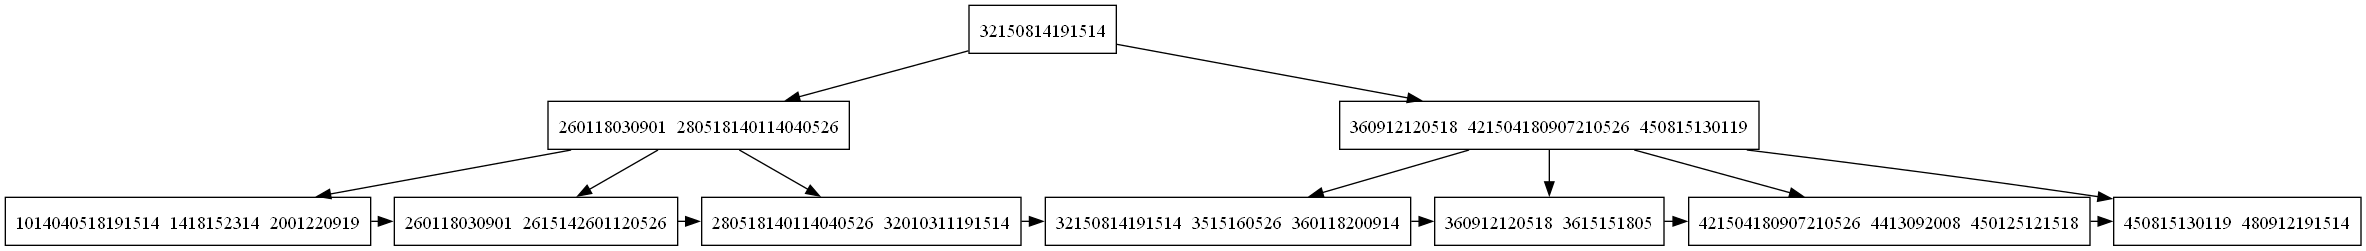

In [132]:
plot(bplustree)

### 5. Реалізувати пошуку за заданим іменем

In [139]:
find_surname('Anderson', bplustree)

Прізвище є у дереві


In [140]:
find_surname('Ponomarenko', bplustree)

Такого прізвища немає у дереві


### 6. Функцію пошуку всіх, чиє ім'я більше чи менше заданого

Подивимось, як виглядає відсортований список прізвищ:

In [142]:
sorted(surnames)

['Anderson',
 'Brown',
 'Davis',
 'Garcia',
 'Gonzalez',
 'Hernandez',
 'Jackson',
 'Johnson',
 'Lopez',
 'Martin',
 'Miller',
 'Moore',
 'Rodriguez',
 'Smith',
 'Taylor',
 'Thomas',
 'Wilson']

Припустимо, що ми хочемо переглянути усі прізвища, що йдуть до *Moore* і після *Jackson*. Подивимось на їх хешкод:

In [143]:
print(fhash('Moore'))
print(fhash('Jackson'))

3615151805
32010311191514


Ще раз переглянемо наявне дерево. На ньому можна візуально побачити які значення хешкодів нас цікавитимуть:

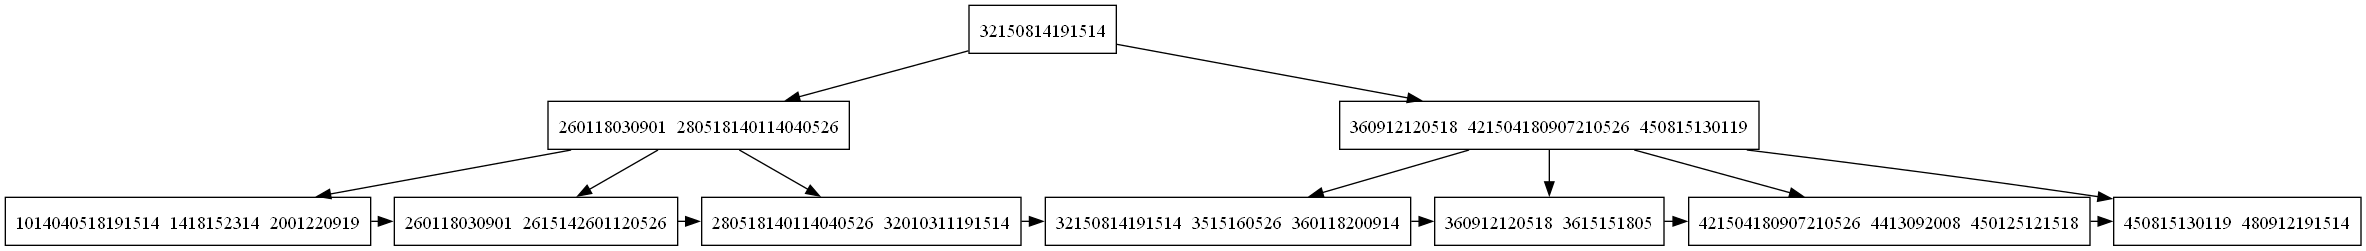

In [141]:
plot(bplustree)

In [156]:
print("Менше за 'Moore':")
print(*lessThan('Moore', bplustree), sep='\n', end='\n\n')
print("Більше за 'Jackson':")
print(*greaterThan('Jackson', bplustree), sep='\n')

Менше за 'Moore':
1014040518191514
1418152314
2001220919
260118030901
2615142601120526
280518140114040526
32010311191514
32150814191514
3515160526
360118200914
360912120518

Більше за 'Jackson':
32150814191514
3515160526
360118200914
360912120518
3615151805
421504180907210526
4413092008
450125121518
450815130119
480912191514


Подивимось яким прізвищам відповідають ці хешкоди і порівняємо порядок цих прізвищ з тим, що ми очікували побачити:

#### Менше за *Moore*:

In [157]:
print('Очікуваний порядок:')
print(sorted(surnames)[:sorted(surnames).index('Moore')])

Очікуваний порядок:
['Anderson', 'Brown', 'Davis', 'Garcia', 'Gonzalez', 'Hernandez', 'Jackson', 'Johnson', 'Lopez', 'Martin', 'Miller']


In [158]:
print('Порядок, повернений функцію порівняння у дереві:')
print(list(map(demo, lessThan('Moore', bplustree))))

Порядок, повернений функцію порівняння у дереві:
['Anderson', 'Brown', 'Davis', 'Garcia', 'Gonzalez', 'Hernandez', 'Jackson', 'Johnson', 'Lopez', 'Martin', 'Miller']


#### Більше за *Jackson*:

In [159]:
print('Очікуваний порядок:')
print(sorted(surnames)[sorted(surnames).index('Jackson')+1:])

Очікуваний порядок:
['Johnson', 'Lopez', 'Martin', 'Miller', 'Moore', 'Rodriguez', 'Smith', 'Taylor', 'Thomas', 'Wilson']


In [160]:
print('Порядок, повернений функцію порівняння у дереві:')
print(list(map(demo, greaterThan('Jackson', bplustree))))

Порядок, повернений функцію порівняння у дереві:
['Johnson', 'Lopez', 'Martin', 'Miller', 'Moore', 'Rodriguez', 'Smith', 'Taylor', 'Thomas', 'Wilson']


### 7. Реалізувати функцію видалення з дерева

Переглянемо В+ дерево:

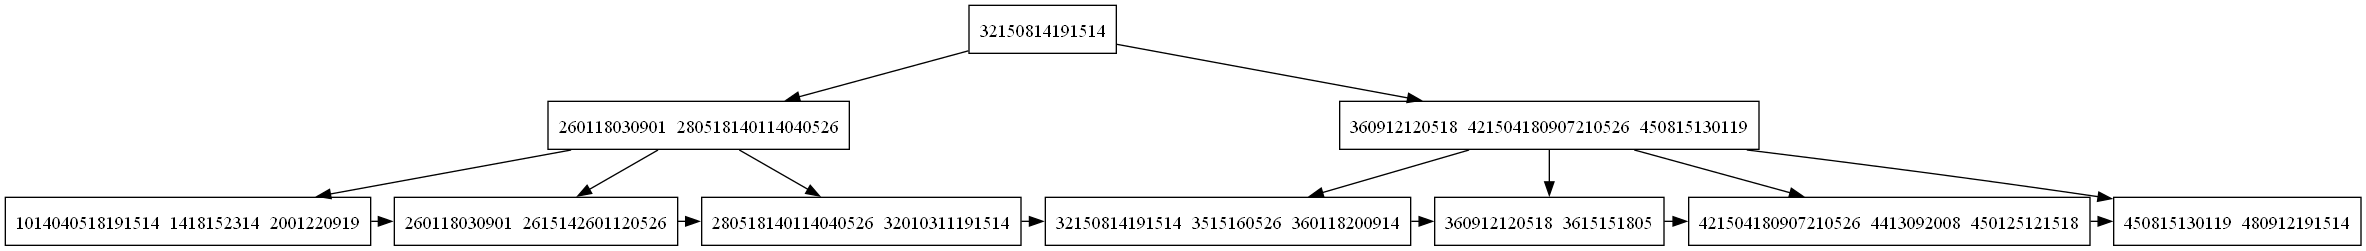

In [163]:
plot(bplustree)

Припустимо, що ми хочемо видалити прізвище з хешкодом '2615142601120526'. Переглянемо якому прізвищу відповідає даний хешкод:

In [164]:
demo('2615142601120526')

'Gonzalez'

Отже, видалимо, наприклад, з В+ дерева прізвище 'Gonzalez':

In [165]:
del_surname('Gonzalez', bplustree)

Знову переглянемо структуру дерева після видалення:

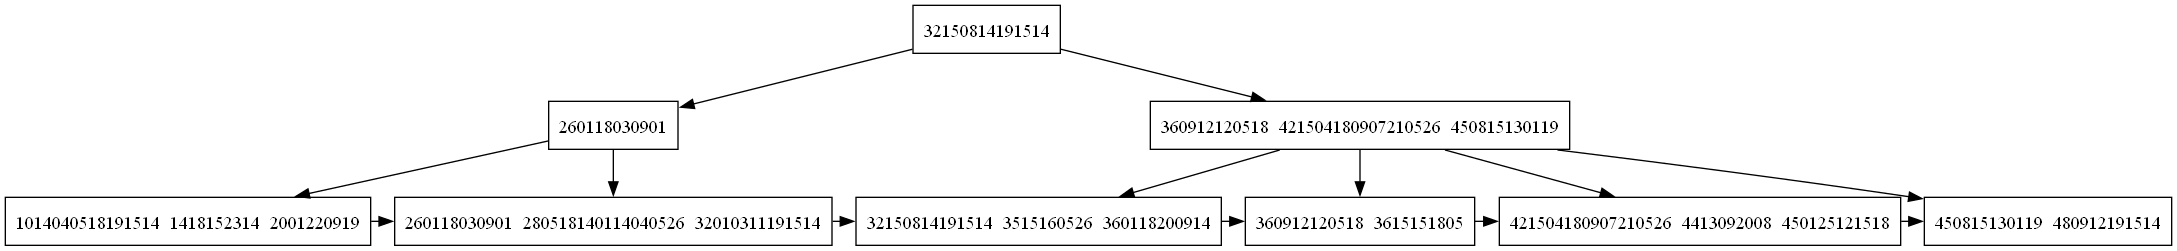

In [166]:
plot(bplustree)

### Питання до роботи

### 1. Яку максимальну та мінімальну кількість елементів може вмістити ваше дерево? Як вирахувати?

#### - максимальна кількість

Припустимо, що нам задане дерево з максимальним порядком (order) = n, мінімальним = 2, та максимальною глибиною m. Тоді кожен вузол міститиме (n - 1) елементів та n нащадків, кожен з яких так само міститиме (n - 1) елементів та n нащадків. Розглянемо кількість елементів на перших декількох рівнях:

- висота дерева = 0: (n - 1) елементів
- висота дерева = 1: (n - 1) * n елементів (n нащадків, на кожному по (n - 1) елементу)
- ...

Отже для дерева глибиною m (відповідно висотою (m - 1)) матимемо:

$max(n, m) = \sum_{i=0}^{m - 1} (n - 1)*n^{i}$

In [169]:
def max_el(n, m):
    total = 0
    for i in range(m):
        total += (n-1)*n**i
    return total

Тож, для дерева з max_order = 4 i depth = 3 матимемо:

In [171]:
print(f'Максимальна кількість елементів = {max_el(4, 3)}')

Максимальна кількість елементів = 63


#### - мінімальна кількість

Оскільки за умовою лабораторної роботи вказується, що максимальна глибина = 3, тобто глибина дерева може бути і меншою (наприклад 1), то мінімальна кількість елементів буде за найменшої висоти дерева (а саме 0). Тоді мінімальна кількість елементів обмежується знизу лиш мінімальним порядком дерева (за умовою min_order = 2). Таким чином, **мінімальна кількість елементів у дереві =** min_order - 1 = 2 - 1 **= 1**

### 2. Щоб помістити 1000 чи 10000 елементів, які мають бути параметри дерева?

Створювати В+ дерево з одного вузла (корня), що містив би 1000 чи 10_000 елементів було б неправильно, адже тоді алгоритм пошуку нічим не відрізнятиметься від пошуку у масиві. Тож, розглядатимемо значення n та m такі, що за умови max(n,m) < 1000 і відповідно max(n,m) < 10000 ми інкрементуватимемо обидва значення на 1. Це відбуватиметься до тих пір, поки максимальна місткість дерева не покриє нажі бажані значення:

In [209]:
n = 2
m = 1

flag = False

In [210]:
while True:
    if max_el(n, m) >= 1000 and flag == False:
        flag = True
        print(f'Щоб помістити 1000 елементів: order = {n}, depth = {m}')
    elif max_el(n, m) < 10000:
        n += 1
        m += 1
    else:
        print(f'Щоб помістити 10_000 елементів: order = {n}, depth = {m}')
        break

Щоб помістити 1000 елементів: order = 6, depth = 5
Щоб помістити 10_000 елементів: order = 7, depth = 6


### 3. Чим особлива ваша хеш-функція, чи дає вона додаткові можливості в разі необхідності оптимізації алгоритму? Чи необхідним для побудови дерева є підлаштована під задачу хеш-функція?

Хеш-функція має досить примітивну реалізацію, яка детальніше була описана у питанні 1. Вона створена за принципом YAGNI - You Ain't Gonna Need It, тобто вона була створена лиш для демонстраційних цілей і при її створенні не ставилася мета створення оптимальної функція для прикладних цілей.

Для вирішення даної задачі хеш-функція має бути підлаштована, адже вона має враховувати алфавітні показники прізвищ. В загальному випадку метою хеш-функцій є забезпечення мінімальної кількості колізій, а не зберігання порядку даних, що хешуються.